# PHYS 331 - Numerical Techniques for the Sciences I
## Homework 3: Number Representation and Root Finding
### Problem 2 - One-Dimensional Root Finding Using the Bisection Method (19 points)
---
Name: *Viktorya Hunanyan*

Onyen: *vhunany*

Cell for *Problem 2* is below.

Testing f1(x) = 3x + sin(x) - exp(x)


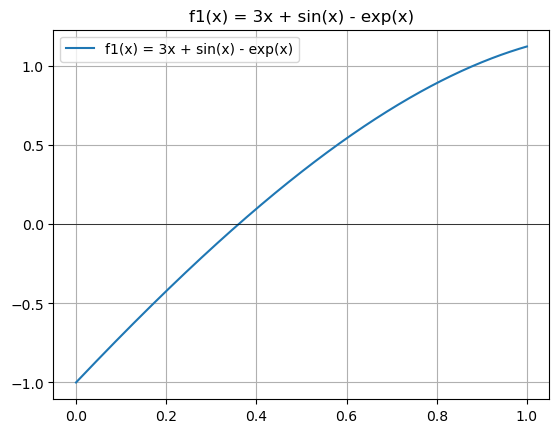

Function f1(x) = 3x + sin(x) - exp(x), interval [0, 1], tol=0.001: root=0.3603515625, iterations=10
Function f1(x) = 3x + sin(x) - exp(x), interval [0, 1], tol=1e-06: root=0.36042118072509766, iterations=20
Function f1(x) = 3x + sin(x) - exp(x), interval [0, 1], tol=1e-12: root=0.3604217029605934, iterations=38

Testing f2(x) = x^3


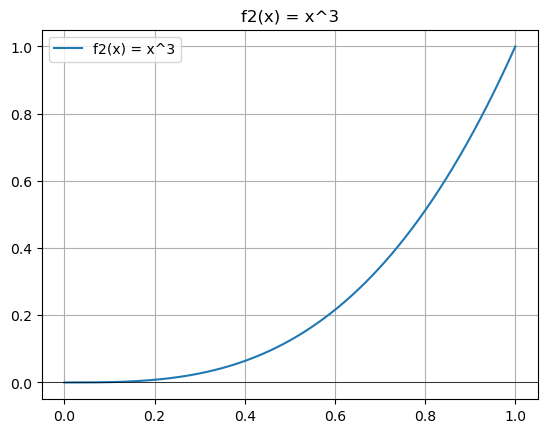

The function must have opposite signs at the bounds x1=0, x2=1.
Function f2(x) = x^3, interval [0, 1], tol=0.001: failed to find root.
The function must have opposite signs at the bounds x1=0, x2=1.
Function f2(x) = x^3, interval [0, 1], tol=1e-06: failed to find root.
The function must have opposite signs at the bounds x1=0, x2=1.
Function f2(x) = x^3, interval [0, 1], tol=1e-12: failed to find root.

Testing f3(x) = sin(1 / (x + 0.01))


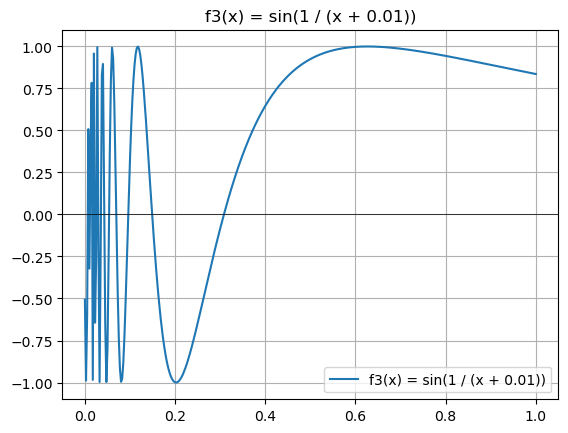

Function f3(x) = sin(1 / (x + 0.01)), interval [0, 1], tol=0.001: root=0.3076171875, iterations=10
Function f3(x) = sin(1 / (x + 0.01)), interval [0, 1], tol=1e-06: root=0.30831050872802734, iterations=20
Function f3(x) = sin(1 / (x + 0.01)), interval [0, 1], tol=1e-12: root=0.30830988618345145, iterations=40

Testing f4(x) = 1 / (x - 0.5)


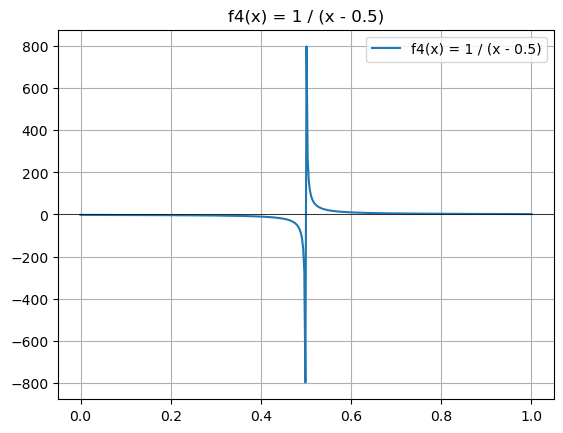

Function f4(x) = 1 / (x - 0.5), interval [0, 1], tol=0.001: root=0.9990234375, iterations=10
Function f4(x) = 1 / (x - 0.5), interval [0, 1], tol=1e-06: root=0.9999990463256836, iterations=20
Function f4(x) = 1 / (x - 0.5), interval [0, 1], tol=1e-12: root=0.9999999999990905, iterations=40


In [62]:
import numpy as np
import matplotlib.pyplot as plt

def rf_bisect(f, x1, x2, tol, maxiter):
    """Computes the value of the root for function f bracketed in the
    domain [x1, x2] using the bisection method."""
    f1 = f(x1)
    f2 = f(x2)
    
    if f1 * f2 >= 0:
        print(f"The function must have opposite signs at the bounds x1={x1}, x2={x2}.")
        return (None, 0)
    
    for iters in range(1, maxiter + 1):
        xmid = (x1 + x2) / 2
        fmid = f(xmid)
        
        if abs(fmid) < tol or abs(x2 - x1) / 2 < tol:
            return (xmid, iters)
        
        if f1 * fmid < 0:
            x2 = xmid
        else:
            x1 = xmid
            f1 = fmid
        
    return (xmid, iters)

# Functions f1, f2, f3, and f4
def f1(x):
    return 3 * x + np.sin(x) - np.exp(x)
    
def f2(x):
    return x**3

def f3(x):
    return np.sin(1. / (x + 0.01))

def f4(x):
    # Handle both scalars and arrays
    if np.isscalar(x):
        if abs(x - 0.5) < 1e-9:
            return np.nan  # Singular point
        else:
            return 1. / (x - 0.5)
    else:
        y = np.zeros_like(x, dtype=float)
        mask = np.abs(x - 0.5) > 1e-9  # Avoid division near singularity
        y[mask] = 1. / (x[mask] - 0.5)
        y[~mask] = np.nan  # Assign NaN for singular points
        return y

def plot_function(f, name, x_range):
    x = np.linspace(x_range[0], x_range[1], 400)
    y = f(x)
    
    plt.figure()
    plt.plot(x, y, label=name)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.title(name)
    plt.legend()
    plt.grid(True)
    plt.show()

def test_bisection(f, name, interval, tolerances):
    x1, x2 = interval
    maxiter = 1000
    for tol in tolerances:
        root, iterations = rf_bisect(f, x1, x2, tol, maxiter)
        if root is not None:
            print(f"Function {name}, interval [{x1}, {x2}], tol={tol}: root={root}, iterations={iterations}")
        else:
            print(f"Function {name}, interval [{x1}, {x2}], tol={tol}: failed to find root.")

def main():
    # Define the interval and tolerances
    interval = (0, 1)
    tolerances = [1e-3, 1e-6, 1e-12]
    
    # Test and plot f1
    print("Testing f1(x) = 3x + sin(x) - exp(x)")
    plot_function(f1, "f1(x) = 3x + sin(x) - exp(x)", interval)
    test_bisection(f1, "f1(x) = 3x + sin(x) - exp(x)", interval, tolerances)

    # Test and plot f2
    print("\nTesting f2(x) = x^3")
    plot_function(f2, "f2(x) = x^3", interval)
    test_bisection(f2, "f2(x) = x^3", interval, tolerances)

    # Test and plot f3
    print("\nTesting f3(x) = sin(1 / (x + 0.01))")
    plot_function(f3, "f3(x) = sin(1 / (x + 0.01))", interval)
    test_bisection(f3, "f3(x) = sin(1 / (x + 0.01))", interval, tolerances)

    # Test and plot f4
    print("\nTesting f4(x) = 1 / (x - 0.5)")
    plot_function(f4, "f4(x) = 1 / (x - 0.5)", interval)
    test_bisection(f4, "f4(x) = 1 / (x - 0.5)", interval, tolerances)

# Run the main function
main()



**For which of the four functions is rf_bisect bound to fail on the given interval? Which solution is meaningless? Suggest remedies to resolve the cause of failure. Submit your assignment with plots for all functions that do not cause the root-finding algorithm to fail.**

The bisection method is a reliable approach for finding roots, but it has its limitations based on the function's behavior and the interval chosen. Some functions in this assignment work well with the method, while others cause issues.

For f_1(x) = 3x + sin(x) - exp(x), the method should perform well as long as the interval includes a sign change. There are no major problems like discontinuities or rapid oscillations, so the algorithm should converge to a root without trouble.

With f_2(x) = x^3, things get tricky if the interval includes 0. The function doesn't change sign at 0, which breaks the bisection method’s requirement that the function must have opposite signs at the interval’s endpoints. Additionally, the slope flattens near the root, which can slow convergence. To avoid this, it's best to choose an interval that avoids 0 or switch to a method like Newton's, which handles flat regions better.

For f_3(x) = sin(1/(x + 0.01)), the method struggles due to rapid oscillations as x approaches 0. These fast oscillations make it hard for the algorithm to reliably find a root because the function crosses the x-axis frequently within a small interval. 

Finally, f_4(x) = 1/(x - 0.5} fails if the interval includes x = 0.5, where there is a singularity (division by zero). The function blows up at this point, making the solution meaningless. To resolve this, you need to modify the interval to avoid x = 0.5 entirely and ensure the algorithm doesn't evaluate the function near the singularity.

In conclusion, while the bisection method works for f_1, it may fail for f_2, f_3, and f_4 due to flat regions, oscillations, and singularities, respectively. These problems can be resolved by adjusting the interval or using a more suitable root-finding method for each case.